
<img src="../../img/ods_stickers.jpg">

## <center> [mlcourse.ai](https://mlcourse.ai) – открытый курс OpenDataScience по машинному обучению 
    
Автор материала: Мария Мансурова, аналитик-разработчик в команде Яндекс.Метрики. Материал распространяется на условиях лицензии [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/). Можно использовать в любых целях (редактировать, поправлять и брать за основу), кроме коммерческих, но с обязательным упоминанием автора материала.

# <center> Домашнее задание № 9. (демо)
## <center> Анализ временных рядов
    
**Заполните пропущенный код и ответьте на вопросы в [онлайн-форме](https://docs.google.com/forms/d/1ijk4aFKY5plPiI8z3Mgi3i1Ln94VBY9SSt6xGIdVVFQ/).**

In [1]:
import os

import pandas as pd
import requests
from plotly import __version__
from plotly import graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot, plot

print(__version__)  # need 1.9.0 or greater

init_notebook_mode(connected=True)


def plotly_df(df, title=""):
    data = []

    for column in df.columns:
        trace = go.Scatter(x=df.index, y=df[column], mode="lines", name=column)
        data.append(trace)

    layout = dict(title=title)
    fig = dict(data=data, layout=layout)
    iplot(fig, show_link=False)

6.3.0


## Подготавливаем данные

Для начала скачаем данные в `dataframe`. Сегодня будем предсказывать просмотры wiki-страницы [Machine Learning](https://en.wikipedia.org/wiki/Machine_learning). Данные я скачала с помощью библиотеки [Wikipediatrend](https://www.r-bloggers.com/using-wikipediatrend/) для `R`.

In [2]:
df = pd.read_csv("../../data/wiki_machine_learning.csv", sep=" ")
df = df[df["count"] != 0]
df.head()

,date,count,lang,page,rank,month,title
81,2015-01-01,1414,en,Machine_learning,8708,201501,Machine_learning
80,2015-01-02,1920,en,Machine_learning,8708,201501,Machine_learning
79,2015-01-03,1338,en,Machine_learning,8708,201501,Machine_learning
78,2015-01-04,1404,en,Machine_learning,8708,201501,Machine_learning
77,2015-01-05,2264,en,Machine_learning,8708,201501,Machine_learning


In [3]:
df.shape

(383, 7)

In [4]:
df.date = pd.to_datetime(df.date)

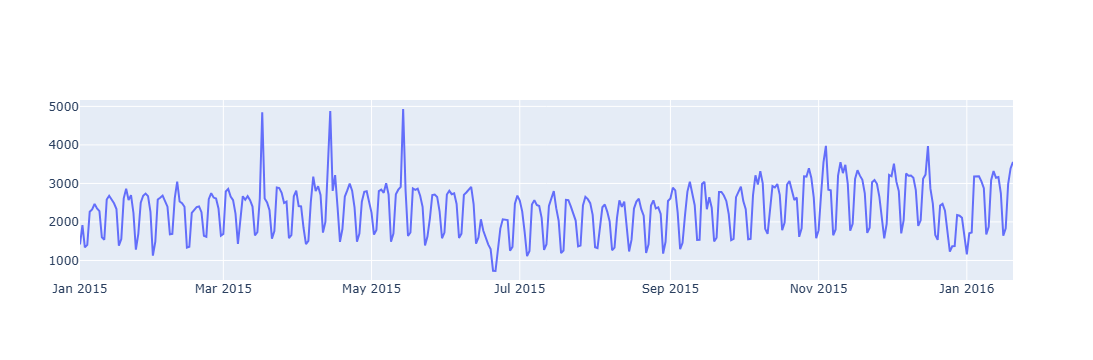

In [5]:
plotly_df(df.set_index("date")[["count"]])

## Предсказание с помощью Facebook Prophet

Для начала построим предсказание с помощью простой библиотеки `Facebook Prophet`. Для того, чтобы посмотреть на качество модели, отбросим из обучающей выборки последние 30 дней.

In [9]:
!pip install prophet

   ---------------------------------------- 0.0/12.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.1 MB ? eta -:--:--
    --------------------------------------- 0.3/12.1 MB ? eta -:--:--
    --------------------------------------- 0.3/12.1 MB ? eta -:--:--
   - -------------------------------------- 0.5/12.1 MB 752.3 kB/s eta 0:00:16
   --- ------------------------------------ 1.0/12.1 MB 1.2 MB/s eta 0:00:10
   ----- ---------------------------------- 1.6/12.1 MB 1.5 MB/s eta 0:00:07
   ------- -------------------------------- 2.4/12.1 MB 2.0 MB/s eta 0:00:05
   ----------- ---------------------------- 3.4/12.1 MB 2.4 MB/s eta 0:00:04
   ------------- -------------------------- 4.2/12.1 MB 2.6 MB/s eta 0:00:04
   ----------------- ---------------------- 5.2/12.1 MB 2.9 MB/s eta 0:00:03
   ------------------- -------------------- 6.0/12.1 MB 3.0 MB/s eta 0:00:03
   ----------------------- -----

In [6]:
from prophet import Prophet

In [7]:
predictions = 30

df = df[["date", "count"]]
df.columns = ["ds", "y"]
train_df = df[:-predictions].copy()

In [9]:
m = Prophet()
m.fit(train_df);

04:00:08 - cmdstanpy - INFO - Chain [1] start processing
04:00:08 - cmdstanpy - INFO - Chain [1] done processing


In [10]:
future = m.make_future_dataframe(periods=predictions)
future.tail()

,ds
378,2016-01-16
379,2016-01-17
380,2016-01-18
381,2016-01-19
382,2016-01-20


In [11]:
forecast = m.predict(future)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
378,2016-01-16,2975.099911,1686.513487,2510.513102,2956.786634,2996.069648,-862.546465,-862.546465,-862.546465,-862.546465,-862.546465,-862.546465,0.0,0.0,0.0,2112.553446
379,2016-01-17,2980.431318,1870.931164,2691.614906,2960.840858,3003.052928,-721.526082,-721.526082,-721.526082,-721.526082,-721.526082,-721.526082,0.0,0.0,0.0,2258.905236
380,2016-01-18,2985.762725,2856.176784,3687.022772,2965.351803,3009.397633,281.376197,281.376197,281.376197,281.376197,281.376197,281.376197,0.0,0.0,0.0,3267.138922
381,2016-01-19,2991.094132,3144.552228,3953.890161,2969.427248,3016.163670,542.213646,542.213646,542.213646,542.213646,542.213646,542.213646,0.0,0.0,0.0,3533.307778
382,2016-01-20,2996.425539,3011.555588,3824.130435,2973.447193,3022.776580,426.073497,426.073497,426.073497,426.073497,426.073497,426.073497,0.0,0.0,0.0,3422.499036


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
378,2016-01-16,2975.099911,1686.513487,2510.513102,2956.786634,2996.069648,-862.546465,-862.546465,-862.546465,-862.546465,-862.546465,-862.546465,0.0,0.0,0.0,2112.553446
379,2016-01-17,2980.431318,1870.931164,2691.614906,2960.840858,3003.052928,-721.526082,-721.526082,-721.526082,-721.526082,-721.526082,-721.526082,0.0,0.0,0.0,2258.905236
380,2016-01-18,2985.762725,2856.176784,3687.022772,2965.351803,3009.397633,281.376197,281.376197,281.376197,281.376197,281.376197,281.376197,0.0,0.0,0.0,3267.138922
381,2016-01-19,2991.094132,3144.552228,3953.890161,2969.427248,3016.163670,542.213646,542.213646,542.213646,542.213646,542.213646,542.213646,0.0,0.0,0.0,3533.307778
382,2016-01-20,2996.425539,3011.555588,3824.130435,2973.447193,3022.776580,426.073497,426.073497,426.073497,426.073497,426.073497,426.073497,0.0,0.0,0.0,3422.499036


**Вопрос 1:** Какое предсказание числа просмотров wiki-страницы на 20 января? Ответ округлите до целого числа.

- Ответ:3833

Оценим качество предсказания по последним 30 точкам.

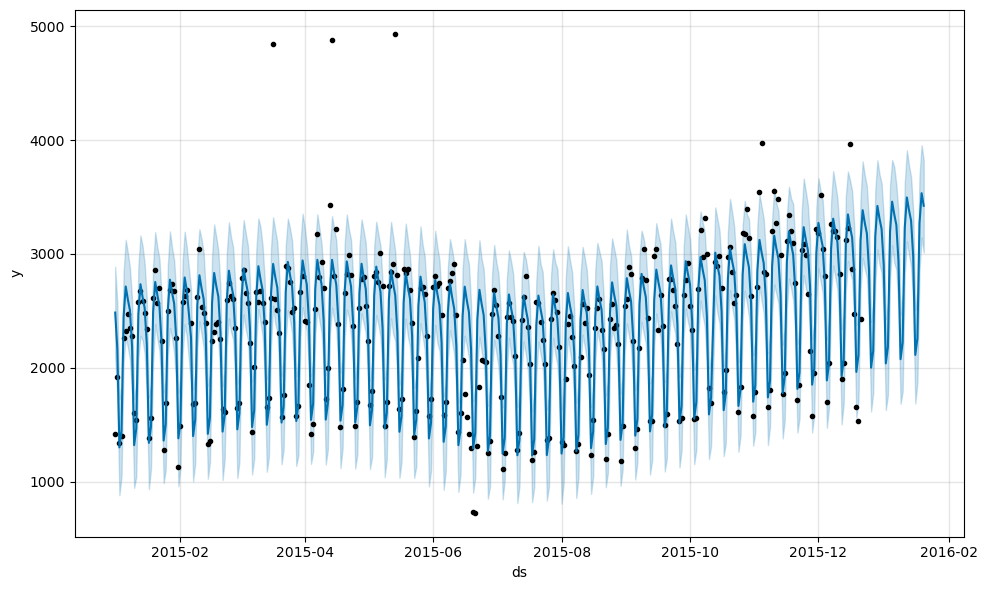

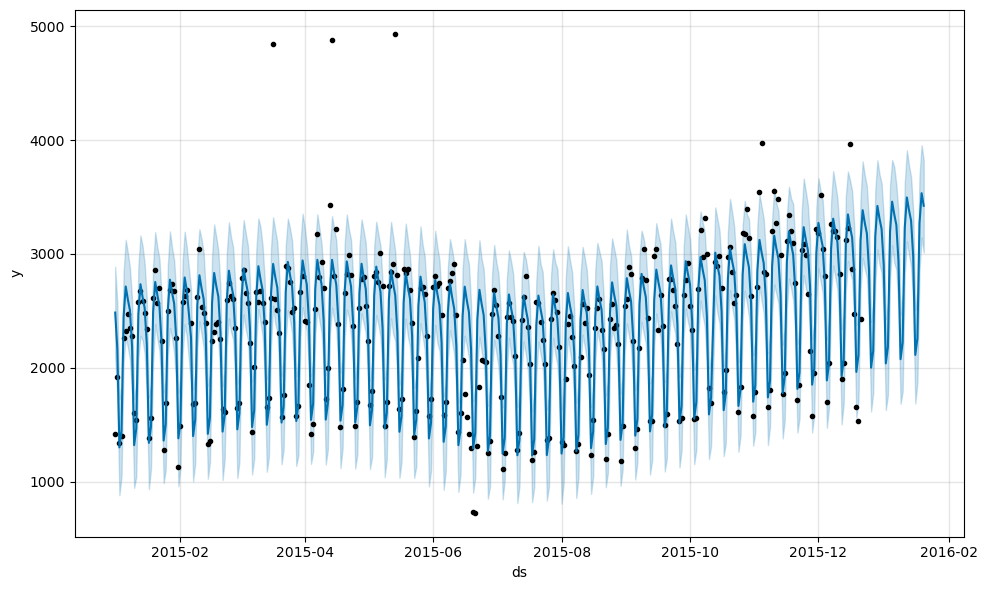

In [12]:
m.plot(forecast)

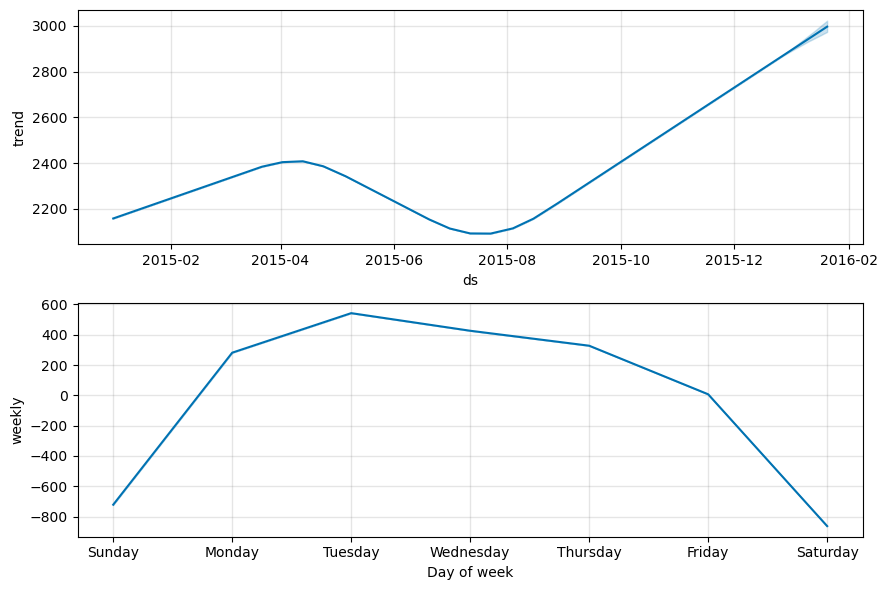

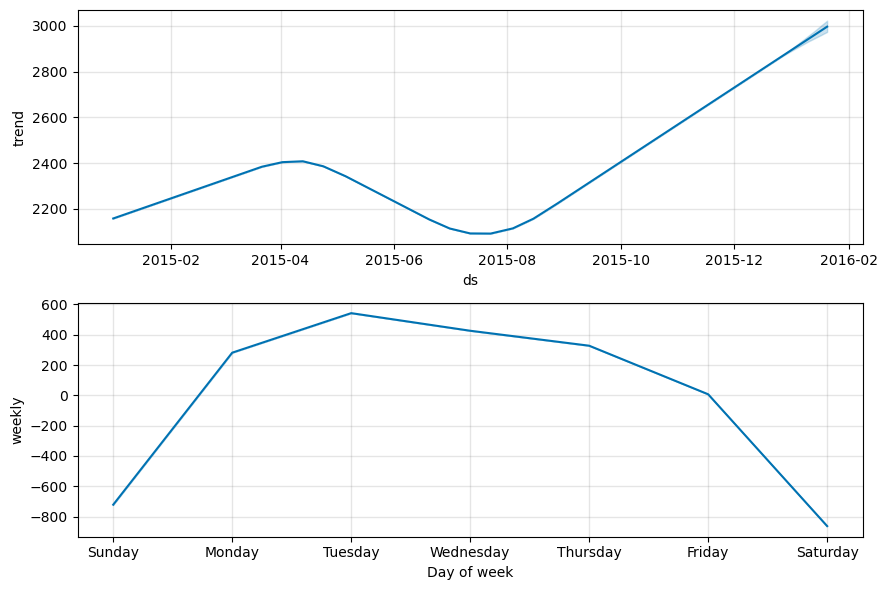

In [13]:
m.plot_components(forecast)

In [14]:
cmp_df = forecast.set_index('ds')[['yhat', 'yhat_lower', 
                                   'yhat_upper']].join(df.set_index('ds'))

In [15]:
import numpy as np
cmp_df['e'] = cmp_df['y'] - cmp_df['yhat']
cmp_df['p'] = 100*cmp_df['e']/cmp_df['y']
print('MAPE = ', round(np.mean(abs(cmp_df[-predictions:]['p'])), 2))
print('MAE = ', round(np.mean(abs(cmp_df[-predictions:]['e'])), 2))

MAPE =  34.35
MAE =  596.73


**Вопрос 2**: Какое получилось MAPE?

**Вопрос 3**: Какое получилось MAE?

## Предсказываем с помощью ARIMA

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats

**Вопрос 4:** Проверим стационарность ряда с помощью критерия Дики-Фулера. Является ли ряд стационарным? Какое значение p-value?

- Ответ: нет, так как p-value >= 0.05

Критерий Дики-Фуллера: p = 0.107392


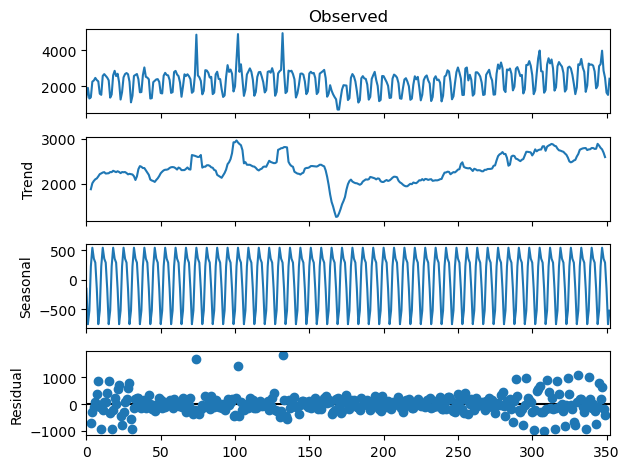

In [18]:
## ВАШ КОД для проверки стационарности ряда ##
import statsmodels.api as sm

# сезонная декомпозиция
sm.tsa.seasonal_decompose(
    train_df['y'].values,
    period=7
).plot();

# тест Дики–Фуллера
p_value = sm.tsa.stattools.adfuller(train_df['y'])[1]
print(f"Критерий Дики-Фуллера: p = {p_value:.6f}")


**Вопрос 5**: Далее перейдем к построению модели SARIMAX (`sm.tsa.statespace.SARIMAX`). Модель c какими параметрами лучшая по `AIC`-критерию?

In [19]:
import itertools
import statsmodels.api as sm
import warnings

warnings.filterwarnings("ignore")

# параметры
p = d = q = range(0, 2)
P = D = Q = range(0, 2)
s = 7  # недельная сезонность

pdq = list(itertools.product(p, d, q))
seasonal_pdq = list(itertools.product(P, D, Q))

best_aic = float("inf")
best_params = None

for param in pdq:
    for seasonal_param in seasonal_pdq:
        try:
            model = sm.tsa.statespace.SARIMAX(
                train_df['y'],
                order=param,
                seasonal_order=(seasonal_param[0], seasonal_param[1], seasonal_param[2], s),
                enforce_stationarity=False,
                enforce_invertibility=False
            )
            results = model.fit(disp=False)

            if results.aic < best_aic:
                best_aic = results.aic
                best_params = (param, seasonal_param)

        except:
            continue

print("Лучшая модель:")
print(f"SARIMAX{best_params[0]} x {best_params[1]}_{s}")
print("AIC:", best_aic)


Лучшая модель:
SARIMAX(1, 1, 1) x (0, 1, 1)_7
AIC: 4892.586319841945
